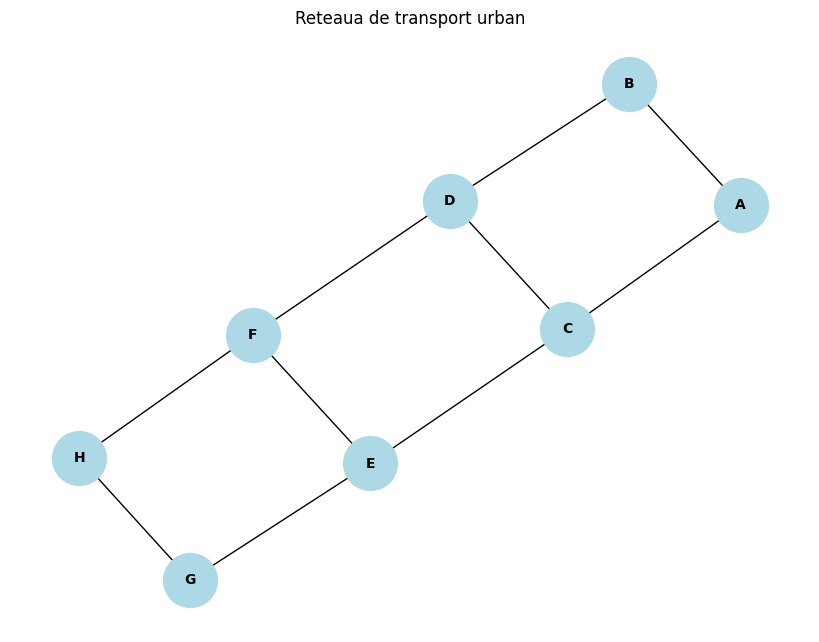

In [12]:

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes (stations)
statii=["A","B","C","D","E","F","G","H"]
G.add_nodes_from(statii)

# Add edges (routes between stations)
rute=[("A", "B"),
       ("A", "C"),
       ("B", "D"),
       ("C", "D"),
       ("C", "E"),
       ("D", "F"),
       ("E", "F"),
       ("E", "G"),
       ("F", "H"),
       ("G", "H")]
G.add_edges_from(rute)

# Visualize the graph
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
plt.title("Reteaua de transport urban")
plt.show()


In [13]:
numar_noduri=G.number_of_nodes()
numar_muchii=G.number_of_edges()
grade=dict(G.degree())


print(f"Numarul de noduri: {numar_noduri}")
print(f"Numarul de muchii: {numar_muchii}")
print(f"Gradele nodurilor: {grade}")


Numarul de noduri: 8
Numarul de muchii: 10
Gradele nodurilor: {'A': 2, 'B': 2, 'C': 3, 'D': 3, 'E': 3, 'F': 3, 'G': 2, 'H': 2}


In [14]:
def dfs(graph, start, goal, path=None):
    if path is None:
        path=[]
    path=path+[start]
    if start==goal:
        return path
    if start not in graph:
        return None
    for node in graph[start]:
        if node not in path:
            newpath=dfs(graph, node, goal, path)
            if newpath:
                return newpath
    return None


def bfs(graph, start, goal):
    queue=[(start, [start])]
    while queue:
        (vertex, path)=queue.pop(0)
        for next in set(graph[vertex])- set(path):
            if next == goal:
                return path+[next]
            else:
                queue.append((next, path +[next]))
    return None

adj_list={node: list(neighbors) for node, neighbors in G.adjacency()}

start_node="A"
end_node="H"

path_dfs=dfs(adj_list, start_node, end_node)
path_bfs=bfs(adj_list, start_node, end_node)

print(f"Path found by DFS:{path_dfs}")
print(f"Path found by BFS:{path_bfs}")

                


Path found by DFS:['A', 'B', 'D', 'C', 'E', 'F', 'H']
Path found by BFS:['A', 'C', 'E', 'F', 'H']


In [15]:
muchii_cu_greutate=[("A", "B", 1),
                    ("A", "C", 2),
                    ("B", "D", 2), 
                    ("C", "D", 1),
                    ("C", "E", 3),
                    ("D", "F", 1),
                    ("E", "F", 2),
                    ("E", "G", 2),
                    ("F", "H", 1),
                    ("G", "H", 3),]


In [16]:
G_cu_greutate=nx.Graph()
G_cu_greutate.add_weighted_edges_from(muchii_cu_greutate)

drumurile_cele_mai_scurte=dict(nx.all_pairs_dijkstra_path_length(G_cu_greutate))
lungimi_drumuri_cele_mai_scurte=dict(nx.all_pairs_dijkstra_path_length(G_cu_greutate))

for sursa in drumurile_cele_mai_scurte:
    for destinatie in drumurile_cele_mai_scurte[sursa]:
        print(f"Drumul cel mai scurt de la {sursa} la {destinatie}: {drumurile_cele_mai_scurte[sursa][destinatie]} cu lungimea {lungimi_drumuri_cele_mai_scurte[sursa]}")


Drumul cel mai scurt de la A la A: 0 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la B: 1 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la C: 2 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la D: 3 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la F: 4 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la E: 5 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la H: 5 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la A la G: 7 cu lungimea {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, 'E': 5, 'H': 5, 'G': 7}
Drumul cel mai scurt de la B la B: 0 cu lungimea {'B': 0, 'A': 1, 'D': 2, 'C': 3, 'F': 3